# Import Library

In [194]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Configurasi Data

In [195]:
# Data configuration
train_path = 'Data/Train/'
test_path = 'Data/Test/'

# Preapare Dataset Untuk Training & Testing

In [196]:
# Preapare dataset for training
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_generator = train_generator.flow_from_directory(train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='sparse')

# Preapare dataset for testing
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_generator = test_gen.flow_from_directory(test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='sparse')

Found 1932 images belonging to 5 classes.
Found 355 images belonging to 5 classes.


In [197]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'botol', 1: 'daunKering', 2: 'kaleng', 3: 'kertas', 4: 'plastic'}


# CNN Model

In [198]:
model = Sequential()

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [199]:
# summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 87616)             0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [200]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [201]:
model.fit_generator(train_generator,epochs=10, 
                                    verbose=1,
                                    steps_per_epoch = 1932//32, 
                                    callbacks=early_stopping)

Epoch 1/10
60/60 [==============================] - 64s 1s/step - loss: 1.5658 - accuracy: 0.4111
Epoch 2/10
60/60 [==============================] - 70s 1s/step - loss: 0.9678 - accuracy: 0.6147
Epoch 3/10
60/60 [==============================] - 66s 1s/step - loss: 0.7635 - accuracy: 0.6995
Epoch 4/10
60/60 [==============================] - 63s 1s/step - loss: 0.5854 - accuracy: 0.7779
Epoch 5/10
60/60 [==============================] - 60s 992ms/step - loss: 0.3410 - accuracy: 0.8805
Epoch 6/10
60/60 [==============================] - 65s 1s/step - loss: 0.2555 - accuracy: 0.9032
Epoch 7/10
60/60 [==============================] - 61s 1s/step - loss: 0.1910 - accuracy: 0.9358
Epoch 8/10
60/60 [==============================] - 57s 949ms/step - loss: 0.1422 - accuracy: 0.9526
Epoch 9/10
60/60 [==============================] - 52s 869ms/step - loss: 0.0824 - accuracy: 0.9742
Epoch 10/10
60/60 [==============================] - 54s 906ms/step - loss: 0.0594 - accuracy: 0.9821


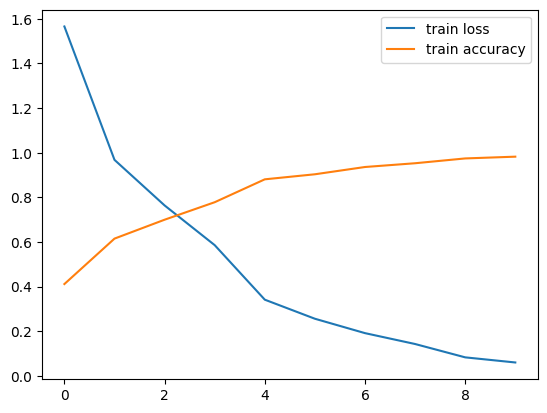

In [202]:
# plot loss and accuracy
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.legend()

In [203]:
# evaluate the model
model.evaluate_generator(test_generator)

[1.9535499811172485, 0.608450710773468]

In [204]:
import keras.utils as ku
import numpy as np

1/1 [==============================] - 0s 72ms/step
Hasil Prediksi:  kertas
Persentase:  99.83 %


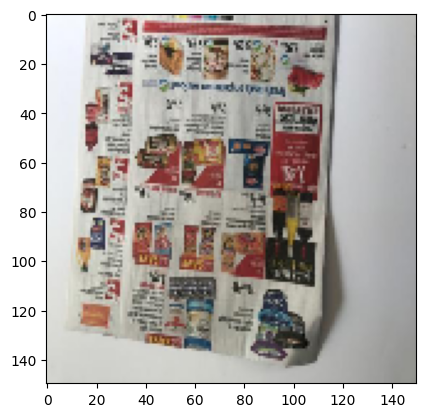

In [216]:
test_image = 'Data/Test/kertas/paper512.jpg'
img = ku.load_img(test_image, target_size=(150, 150))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0
predic = model.predict(img)
# jika gambar yang diprediksi tidak ada di folder direktori, maka akan menampilkan "Tidak Diketahui"
if np.argmax(predic) in class_map:
    print("Hasil Prediksi: ", class_map[np.argmax(predic)])
    print("Persentase: ", round(np.max(predic)*100,2), "%")
    plt.imshow(img[0])
    plt.show()
else:
    print("Object Tidak Diketahui")


1/1 [==============================] - 0s 55ms/step
[[8.5018659e-01 2.9086068e-04 2.8833171e-04 2.6942720e-05 1.4920683e-01
  1.2328165e-08 3.9916355e-09 1.5493452e-08 6.1342305e-09 7.3344628e-09
  4.6759161e-09 2.7283977e-07 5.1744177e-08 3.6241751e-08 2.6842345e-10]]
Hasil Prediksi:  botol
Persentase:  85.02 %


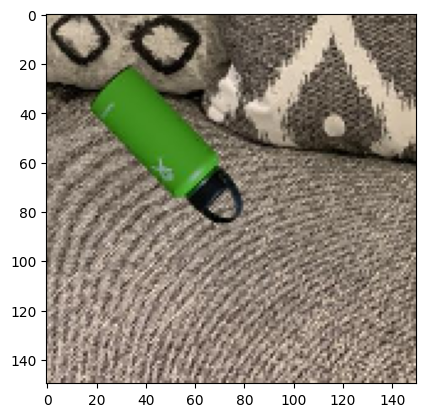

In [220]:
# Generate predictions for external images
test_image = 'Data/Test/botol/botol18.jpg'
img = ku.load_img(test_image, target_size=(150, 150))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0
predic = model.predict(img)
print(predic)
# tampilkan hasil prediksi
if np.argmax(predic) in class_map:
    print("Hasil Prediksi: ", class_map[np.argmax(predic)])
    print("Persentase: ", round(np.max(predic)*100,2), "%")
    plt.imshow(img[0])
    plt.show()
else:
    print("Object Tidak Diketahui")